In [1]:
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from model import Net
from torchvision import transforms

sys.path.insert(0, '../..')
from load import load
from train import train, eval
from utils import plot_learningcurve, get_metrics
from dataset import psf_dataset, splitDataLoader, ToTensor, Normalize

In [2]:
model = Net()

# GPU support
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
model.to(device)

Net(
  (conv1): Conv2d(2, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(40, 20, kernel_size=(1, 1), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=5120, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=20, bias=True)
)

In [3]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.02)

In [4]:
# Data set
data_dir = '../../dataset/'
dataset_size = 10
dataset = psf_dataset(
                      root_dir = data_dir,
                      size = dataset_size,
                      transform = transforms.Compose([Normalize(data_dir),ToTensor()])
                     )

In [5]:
train(
      model, 
      dataset, 
      optimizer, 
      criterion,
      split = [0.9, 0.1],
      batch_size = 16,
      n_epoch = 50,
      random_seed = 42,
      model_dir = './',
      visdom = True  
     )

Training started on cpu
Visdom successfully connected to server
[1/50] Train loss: 22086.562500 
[1/50] Validation loss: 17609.824219 
[1/50] Time: 0.609066 s
------------------------------
[2/50] Train loss: 21614.558594 
[2/50] Validation loss: 24526.812500 
[2/50] Time: 0.568380 s
------------------------------
[3/50] Train loss: 22907.740234 
[3/50] Validation loss: 17766.271484 
[3/50] Time: 0.658451 s
------------------------------
[4/50] Train loss: 21292.800781 
[4/50] Validation loss: 17088.226562 
[4/50] Time: 0.670123 s
------------------------------
[5/50] Train loss: 21715.123047 
[5/50] Validation loss: 16830.875000 
[5/50] Time: 0.663541 s
------------------------------
[6/50] Train loss: 21757.917969 
[6/50] Validation loss: 16449.646484 
[6/50] Time: 0.646984 s
------------------------------
[7/50] Train loss: 21685.408203 
[7/50] Validation loss: 15976.036133 
[7/50] Time: 0.656560 s
------------------------------
[8/50] Train loss: 21552.484375 
[8/50] Validation los

<Figure size 432x288 with 0 Axes>

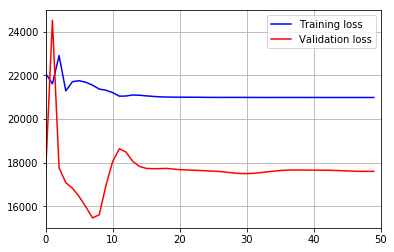

In [6]:
metrics = get_metrics()
plot_learningcurve(metrics)